# Aaron Tan
## Mini Project 2 - Tech Gadget Mental Wellbeing

#### Import all the python libraries required for this project

In [59]:
# Standard Pyhton libaries
import pandas as pd
import requests
import folium
from folium.plugins import HeatMap
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Classification Model libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Table of contents:
<!-- Fix this later -->
[1. Load CSV Data & Perform EDA](#1-load-csv-data-and-eda-analysis)
- [1.1 Column Description](#11-column-description)
- [1.2 Outliers Summary](#12-outliers-summary)


## 1. Load CSV Data and EDA Analysis
Begin by loading the dataset and conducting Exploratory Data Analysis (EDA) to understand the features, their distributions, and relationships. The goal is to identify which variables are most relevant and how they may influence or predict mental health status.

Reference from: https://www.kaggle.com/datasets/kasunvishvajith/tech-gadget-usage-and-mental-wellbeing

### About This Dataset
This dataset contains information collected from 1,000 individuals across different countries, focused on understanding the relationship between daily technology usage and mental wellbeing. It includes demographic details, tech usage patterns, lifestyle habits, and mental health indicators.



In [60]:
tech_mental_csv = "TechMental.csv"
df = pd.read_csv(tech_mental_csv)
df.head()

,User.ID,Age,Gender,Country,Device.Type,Daily.Screen.Time,Social.Media.Hours,Work.Screen.Hours,Gaming.Hours,Sleep.Hours,Sleep.Quality,Stress.Level,Physical.Activity.Min,Productivity.Score,Mental.Health.Status
0,1,54,Female,Germany,Tablet,5.0,1.9,6.0,0.9,6.5,9,8,106,2,Healthy
1,2,44,Other,Australia,Laptop,4.6,1.8,0.0,0.1,6.4,5,7,86,7,Healthy
2,3,30,Female,USA,Phone,3.5,4.1,5.3,1.5,6.1,5,2,66,4,Healthy
3,4,58,Female,Canada,Laptop,10.0,0.4,2.5,0.1,5.9,10,7,61,8,Healthy
4,5,23,Female,UK,Laptop,7.1,3.7,2.7,0.7,9.7,4,6,2,8,Chronic Issues


In [61]:
df.columns

Index(['User.ID', 'Age', 'Gender', 'Country', 'Device.Type',
       'Daily.Screen.Time', 'Social.Media.Hours', 'Work.Screen.Hours',
       'Gaming.Hours', 'Sleep.Hours', 'Sleep.Quality', 'Stress.Level',
       'Physical.Activity.Min', 'Productivity.Score', 'Mental.Health.Status'],
      dtype='object')

### 1.1 Column Descriptions:

14 Features:
- User.ID - A unique identifier for each participant in the dataset.
- Age - Age of the participant, ranging from 16 to 64 years old.
- Gender - Gender of the participant. Possible values: Male, Female, or Other.
- Country - The country where the participant lives. Includes countries like USA, India, UK, Germany, Canada, and Australia.
- Device.Type - The primary device used most frequently by the participant. Possible values: Phone, Laptop, Tablet, or Desktop.
- Daily.Screen.Time - Total screen time (in hours) spent per day across all devices.
- Social.Media.Hours - Average number of hours per day spent on social media platforms (e.g., Instagram, TikTok, Twitter).
- Work.Screen.Hours - Number of screen hours per day dedicated to work or academic tasks.
- Gaming.Hours - Number of hours spent on gaming per day.
- Sleep.Hours - Average sleep duration in hours per day.
- Sleep.Quality - Self-reported sleep quality rated on a scale from 1 (very poor) to 10 (excellent).
- Stress.Level - Self-reported daily stress level rated on a scale from 1 (very low stress) to 10 (extremely high stress).
- Physical.Activity.Min - Total number of minutes of physical activity performed per day.
- Productivity.Score - Self-rated productivity score on a scale from 1 (very low) to 10 (very high), reflecting how effective the person feels throughout the day.

Predict variable:
- Mental.Health.Status - The participant's overall mental health status. Categories:
    1. Healthy: No known mental health issues
    2. Moderate Issues: Some stress, anxiety, or occasional low mood
    3. Chronic Issues: Ongoing or clinically significant mental health concerns


In [62]:
df.shape

(1000, 15)

In [63]:
print(df.describe())

           User.ID          Age  Daily.Screen.Time  Social.Media.Hours  \
count  1000.000000  1000.000000        1000.000000         1000.000000   
mean    500.500000    40.379000           5.959200            2.548900   
std     288.819436    14.122138           1.952657            1.418461   
min       1.000000    16.000000           1.000000            0.000000   
25%     250.750000    28.000000           4.600000            1.500000   
50%     500.500000    41.000000           6.000000            2.500000   
75%     750.250000    52.000000           7.300000            3.500000   
max    1000.000000    64.000000          11.500000            8.000000   

       Work.Screen.Hours  Gaming.Hours  Sleep.Hours  Sleep.Quality  \
count        1000.000000   1000.000000  1000.000000    1000.000000   
mean            4.003900      1.040300     6.537100       5.459000   
std             1.944906      0.984162     1.213634       2.843661   
min             0.000000      0.000000     3.100000  

Check if there is any NAs or outliers

In [64]:
# Count missing values in each column
print(df.isna().sum())

User.ID                  0
Age                      0
Gender                   0
Country                  0
Device.Type              0
Daily.Screen.Time        0
Social.Media.Hours       0
Work.Screen.Hours        0
Gaming.Hours             0
Sleep.Hours              0
Sleep.Quality            0
Stress.Level             0
Physical.Activity.Min    0
Productivity.Score       0
Mental.Health.Status     0
dtype: int64


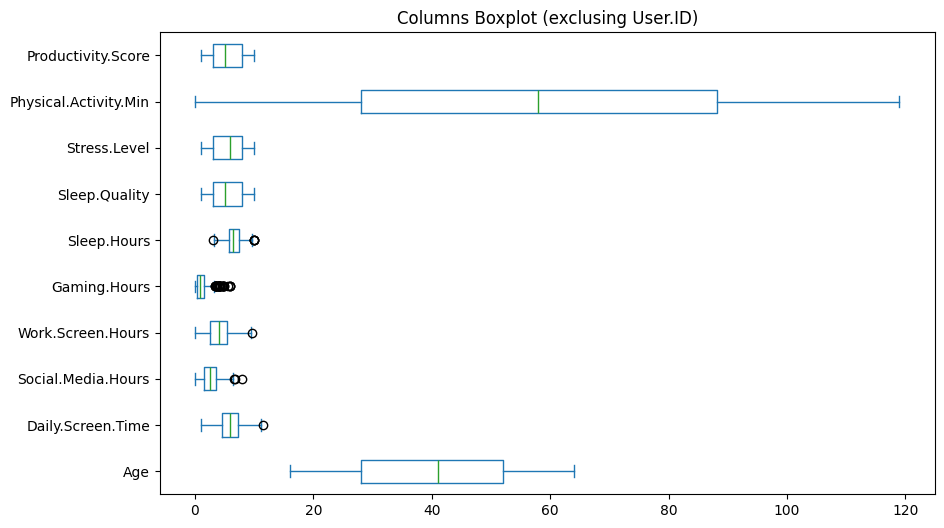

In [65]:
# Boxplot to showcase visually if there is any outliers in this case there are couple of columns that has outliers

df.drop(columns=["User.ID"]).plot(
    kind="box",
    vert=False,        # horizontal orientation
    figsize=(10, 6)
)
plt.title("Columns Boxplot (exclusing User.ID)")
plt.show()

Columns with outliers: ['Daily.Screen.Time', 'Social.Media.Hours', 'Work.Screen.Hours', 'Gaming.Hours', 'Sleep.Hours']


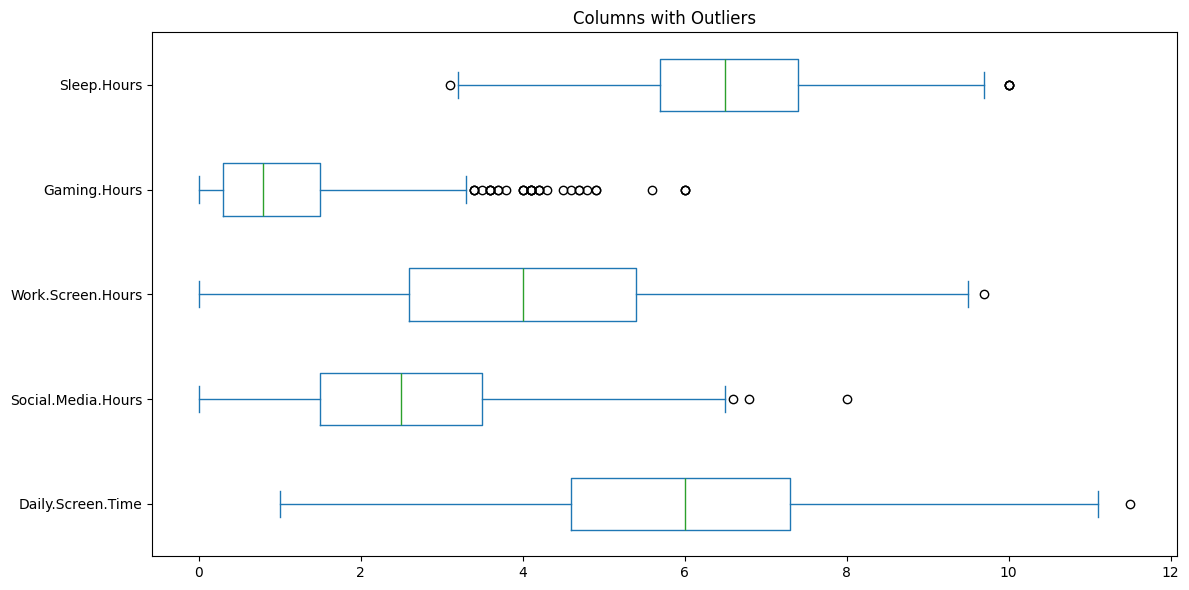

In [66]:
# 1. Drop userID and keep only numeric columns
df_num = df.drop(columns=["User.ID"], errors="ignore").select_dtypes(include=[np.number])

# 2. IQR method for outlier detection
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

# 3. Find columns with at least 1 outlier
cols_with_outliers = outlier_mask.sum()[outlier_mask.sum() > 0].index.tolist()

if cols_with_outliers:
    print("Columns with outliers:", cols_with_outliers)
    
    # 4. Plot only those columns
    df_num[cols_with_outliers].plot(
        kind="box", vert=False, figsize=(12, 6)
    )
    plt.title("Columns with Outliers")
    plt.tight_layout()
    plt.show()
else:
    print("✅ No outliers detected in any column.")

We can see that <b>"Physical.Activity.Min" and "Age"</b> has a large variance, with its boxplot showing a much wider spread compared to the other variables. Additionally, we identified five variables that contain outliers.

In [67]:
# Calculate variance and std
variances = df.drop(columns=["User.ID"], errors="ignore").var(numeric_only=True)
stds = df.drop(columns=["User.ID"], errors="ignore").std(numeric_only=True)

# Combine into one DataFrame
summary = pd.DataFrame({
    "Variance": variances,
    "Standard Deviation": stds
})

# Sort by variance (descending)
summary = summary.sort_values(by="Variance", ascending=False)

print(summary)

                          Variance  Standard Deviation
Physical.Activity.Min  1219.359259           34.919325
Age                     199.434794           14.122138
Productivity.Score        8.353128            2.890178
Stress.Level              8.264164            2.874746
Sleep.Quality             8.086405            2.843661
Daily.Screen.Time         3.812868            1.952657
Work.Screen.Hours         3.782657            1.944906
Social.Media.Hours        2.012031            1.418461
Sleep.Hours               1.472906            1.213634
Gaming.Hours              0.968574            0.984162


Outliers per column based on Z-score:
Social.Media.Hours     1
Gaming.Hours          23
dtype: int64


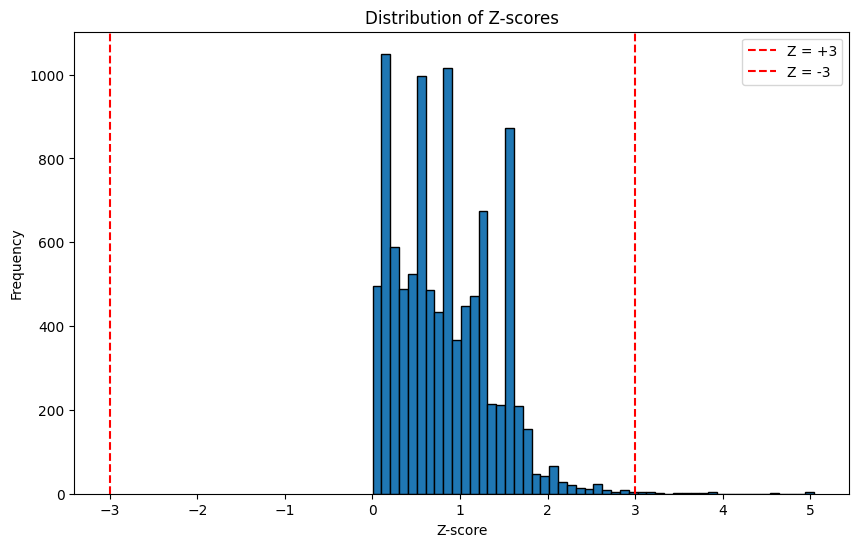

In [68]:
# Only numeric columns (exclude User.ID)
numeric_df = df.drop(columns=["User.ID"], errors="ignore").select_dtypes(include=[np.number])

# Compute Z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Flag values where |Z| > 3
outlier_mask = (z_scores > 3)

# Count outliers per column
outliers_per_col = outlier_mask.sum(axis=0)

print("Outliers per column based on Z-score:")
print(outliers_per_col[outliers_per_col > 0])

# Convert to NumPy array, then flatten
z_array = z_scores.to_numpy().flatten()

plt.figure(figsize=(10,6))
plt.hist(z_array, bins=50, edgecolor="k")
plt.axvline(3, color="r", linestyle="--", label="Z = +3")
plt.axvline(-3, color="r", linestyle="--", label="Z = -3")
plt.title("Distribution of Z-scores")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 1.2 Outliers Summary (Z-score >= 3)

##### Social.Media.Hours
Social.Media.Hours → 1 outlier
There is 1 observation where the number of social media hours is unusually high (or low), more than 3 standard deviations away from the average user.
→ This might be someone who spends an extreme amount of time on social media compared to the rest.

Interpretation: One unusual case isn’t too concerning. It could just be someone who legitimately uses social media far more than the rest.

##### Gaming.Hours
Gaming.Hours → 23 outliers
There are 23 observations where gaming hours are way above (or below) the typical pattern.
→ This is a big red flag: it suggests the Gaming.Hours variable has a lot of extreme values. People in your dataset may vary wildly in how much time they spend gaming.

Interpretation: This is more serious. 23 outliers suggest that gaming time is highly variable across people. Some may be light gamers, some heavy gamers, and some extreme cases.

- If the outliers are plausible (e.g., 8–12 hours of gaming per day), then they might reflect real behavior. In this case, keep them but consider using robust statistics (like median instead of mean) so they don’t dominate the analysis.
- If the outliers are implausible or errors (e.g., 999 hours), then you should clean them — either remove those rows or cap them at a realistic maximum (a technique called winsorizing).
- If the distribution is just naturally skewed, you can apply a log transformation to stabilize variance and reduce the impact of extremes.

Check the specific values that are flagged as outliers. If they fall within a reasonable range, they can be retained. If not, we need to re-evaluate whether it is necessary to clean or adjust these outliers in the dataset.

In [69]:
# For Social.Media.Hours
z_sm = np.abs(stats.zscore(df["Social.Media.Hours"]))
outliers_sm = df[z_sm > 3]["Social.Media.Hours"]

# Social media outlier row
df[z_sm > 3]

,User.ID,Age,Gender,Country,Device.Type,Daily.Screen.Time,Social.Media.Hours,Work.Screen.Hours,Gaming.Hours,Sleep.Hours,Sleep.Quality,Stress.Level,Physical.Activity.Min,Productivity.Score,Mental.Health.Status
323,324,22,Female,Canada,Phone,4.0,8.0,4.0,1.4,7.2,2,8,10,3,Healthy


In [70]:
# For Gaming.Hours
z_gaming = np.abs(stats.zscore(df["Gaming.Hours"]))
outliers_gaming = df[z_gaming > 3]["Gaming.Hours"]
# Gaming outlier rows
df[z_gaming > 3]

,User.ID,Age,Gender,Country,Device.Type,Daily.Screen.Time,Social.Media.Hours,Work.Screen.Hours,Gaming.Hours,Sleep.Hours,Sleep.Quality,Stress.Level,Physical.Activity.Min,Productivity.Score,Mental.Health.Status
14,15,39,Male,USA,Laptop,8.1,2.1,7.7,4.1,6.2,5,8,102,2,Moderate Issues
57,58,50,Male,UK,Laptop,6.6,2.1,6.0,4.0,8.7,8,6,29,9,Chronic Issues
133,134,52,Female,UK,Laptop,6.0,3.2,3.0,4.0,7.3,7,7,29,6,Healthy
134,135,62,Male,Canada,Desktop,4.0,3.0,6.2,4.1,6.6,3,6,76,8,Healthy
155,156,52,Female,USA,Laptop,3.5,1.0,3.7,4.9,4.6,10,4,103,5,Healthy
211,212,64,Female,Germany,Phone,6.3,3.9,4.2,4.9,5.7,8,10,95,7,Moderate Issues
230,231,26,Female,Canada,Phone,6.3,1.4,5.1,4.2,7.2,8,3,57,5,Healthy
333,334,53,Other,Australia,Laptop,9.0,1.5,6.9,4.1,6.1,3,6,52,8,Healthy
336,337,23,Female,India,Laptop,7.5,3.3,4.5,5.6,6.7,8,6,89,4,Healthy
470,471,31,Female,India,Desktop,7.1,2.5,4.3,6.0,5.9,6,5,88,5,Healthy


The outliers identified in both columns are not excessively extreme and fall within plausible ranges. Therefore, the dataset remains valid, and no additional data cleaning is required. 

As a result, there is no need to generate a new CSV file before proceeding with the Classification Model.

## 2. Classification Modeling and Evaluation

Now we are at the stage to perform the following sub-sections:
- Train and Test Split dataset
- Feature Selection and Engineering
- Model Selection (Supervised Models)
- Model Metrics and Evaulation Results (Confusion Matrix, ROC and AUC curve)

#### 2.1 Train and Test Split Dataset

#### 2.2 Feature Selection and Engineering

#### 2.3 Model Selection (Supervised Models)

#### 2.4 Model Metrics and Evaulation Results (Confusion Matrix, ROC and AUC curve)